# Path pattern Generating using BFS & DFS

## Libraries

In [1]:
import ppg_init as ppg
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from queue import Queue
from queue import LifoQueue
import math

initialized data is stored in the following directory:
..\data\generated image numbers


## Fetch preprocessed data

In [2]:
number_gray = np.zeros((ppg.NO_DIGITS, ppg.IMG_WIDTH ,ppg.IMG_HEIGHT))
for i in range (ppg.NO_DIGITS):
    number_image = cv.imread(ppg.IMAGE_PATH+' '+str(i)+' dilated.png')
    number_gray[i] = cv.cvtColor(number_image, cv.COLOR_BGR2GRAY)

## Find endpoints
finding the endpoints of each number with an algorithm.

### find the first black pixel
since the pixel might be isolated we have to iterate all of the pixels.

In [3]:
# normalize x, y values based on the input image sizes
# norm_x = x/300
# norm_y = y/300
#TODO ^

firstpxl_img = []
visited_img = np.empty((10, 300, 300))
# visit status
unvisited_status = -4
# -3 for not visited at all.
# -2 for not iterated for location extraction phase.
# any other value represents the pixel value intensity from the image.
for i in range(10):
    print('digit = ', i, '----------------')
    BFSqueue = Queue()
    myimg = number_gray[i]
    found = False
    # 0 is balck and 255 is white
    # anything under 50 pixel value is considered black here.
    visited_img[i, :, :] = (myimg<50)*unvisited_status
    firstpxl_img.append((0,0)) # default # to extend the length of the list.
    for x in range(len(myimg)):
        for y in range(len(myimg[x])):
            max_black_num = -1 # the number of black pixels which are connected to this pixel.
            # store each potential first black pixel point
            # using BFS to determine all adjacent pixels.
            if(visited_img[i, x,y]== unvisited_status): # is black and unvisited.
                pxl_counter = 0
                BFSqueue.put((x,y))
                while(not BFSqueue.empty()):
                    xt,yt = BFSqueue.get()
                    for xtt in range(xt-1, xt+2):
                        for ytt in range(yt-1, yt+2):
                            if(xtt==xt and ytt==yt):
                                continue
                            if(visited_img[i, xtt,ytt] == unvisited_status): # is black and unvisited.
                                pxl_counter+=1
                                visited_img[i, xtt,ytt] = unvisited_status + 1 # visited once
                                BFSqueue.put((xtt,ytt))
                if(max_black_num<pxl_counter):
                    print('number of black pixels connected to the first black pixel :', pxl_counter)
                    firstpxl_img[i] = (x,y)
                    max_black_num = pxl_counter

print('------------------------------ done.')
print('all recorded first black pixels', firstpxl_img)
unvisited_status += 1

digit =  0 ----------------
number of black pixels connected to the first black pixel : 863
digit =  1 ----------------
number of black pixels connected to the first black pixel : 563
digit =  2 ----------------
number of black pixels connected to the first black pixel : 1531
digit =  3 ----------------
number of black pixels connected to the first black pixel : 1447
digit =  4 ----------------
number of black pixels connected to the first black pixel : 1533
digit =  5 ----------------
number of black pixels connected to the first black pixel : 1262
digit =  6 ----------------
number of black pixels connected to the first black pixel : 1299
digit =  7 ----------------
number of black pixels connected to the first black pixel : 929
digit =  8 ----------------
number of black pixels connected to the first black pixel : 1805
digit =  9 ----------------
number of black pixels connected to the first black pixel : 1459
------------------------------ done.
all recorded first black pixels [(80

### Find last(lowest) black pixel
for drawing an eight digit we need the zero digit and to do that, we have to extract the zero digit image lowest position and highest position. the reason is we need two zero digits vertically connected to each other for drawing an eight.

In [4]:
# in order to have more readability we extract lowest point for all digits,
# regardless of the necessity.

lowestpxl_img = []
visited_lastpxl_img = np.empty((10, 300, 300)) # not to be confused with 
# visit status
# -3 for not visited at all.
# -1 for not iterated for location extraction phase.
# any other value represents the pixel value intensity from the image.
for i in range(10):
    print('digit = ', i, '----------------')
    BFSqueue = Queue()
    myimg = number_gray[i]
    found = False
    # 0 is balck and 255 is white
    # anything under 50 pixel value is considered black here.
    visited_lastpxl_img[i, :, :] = (myimg<50)*-4
    lowestpxl_img.append((0,0)) # default # to extend the length of the list.
    for x in range(len(myimg)-1, -1, -1): # bottom-up
        for y in range(len(myimg[x])-1, -1, -1): # left-right
            max_black_num = -1 # the number of black pixels which are connected to this pixel.
            # store each potential first black pixel point
            # using BFS to determine all adjacent pixels.
            if(visited_lastpxl_img[i, x,y]==-4): # is black and unvisited.
                pxl_counter = 0
                BFSqueue.put((x,y))
                while(not BFSqueue.empty()):
                    xt,yt = BFSqueue.get()
                    for xtt in range(xt-1, xt+2):
                        for ytt in range(yt-1, yt+2):
                            if(xtt==xt and ytt==yt):
                                continue
                            if(visited_lastpxl_img[i, xtt,ytt]==-4): # is black and unvisited.
                                pxl_counter+=1
                                visited_lastpxl_img[i, xtt,ytt] = -3 # visited once
                                BFSqueue.put((xtt,ytt))
                if(max_black_num<pxl_counter):
                    print('number of black pixels connected to the first black pixel :', pxl_counter)
                    lowestpxl_img[i] = (x,y)
                    max_black_num = pxl_counter
print('------------------------------ done.')
print('all recorded first black pixels', lowestpxl_img)

digit =  0 ----------------
number of black pixels connected to the first black pixel : 863
digit =  1 ----------------
number of black pixels connected to the first black pixel : 563
digit =  2 ----------------
number of black pixels connected to the first black pixel : 1531
digit =  3 ----------------
number of black pixels connected to the first black pixel : 1447
digit =  4 ----------------
number of black pixels connected to the first black pixel : 1533
digit =  5 ----------------
number of black pixels connected to the first black pixel : 1262
digit =  6 ----------------
number of black pixels connected to the first black pixel : 1299
digit =  7 ----------------
number of black pixels connected to the first black pixel : 929
digit =  8 ----------------
number of black pixels connected to the first black pixel : 1805
digit =  9 ----------------
number of black pixels connected to the first black pixel : 1459
------------------------------ done.
all recorded first black pixels [(19

### global datastructures

In [7]:
# previous datastructures.
# BFSqueue
# firstpxl_img
# visited_img
# unvisited_status
# visited_lastpxl_img
# img_dilation
# need a queue to iterate the them, this is a BFS algorithm,
# to iterate all the image and find the endpoints for each image using the visited_img matrix.
endpoint_stack_img = []
for i in range(10):
    endpoint_stack_img.append(LifoQueue())

# the endpoints at the end are saved in the endpoint stack as there are expected to be multiple endpoints.

### the algorithm
used BFS and visit matrix to determine the last point which is surrounded with -1 in visit matrix. and the last point will be marked as an endpoint
and it will be stored in the queue.

In [8]:
for i in range(10):
    x, y = firstpxl_img[i]
    BFSqueue = Queue()
    BFSqueue.put((x,y))

    while(not BFSqueue.empty()):
        has_unvisited_neighb = False
        x,y = BFSqueue.get()
        # check unvisited neighbors.
        for xt in range(x-1, x+2):
            for yt in range(y-1, y+2):
                if(y==yt and x==xt):
                    visited_img[i, xt, yt] = unvisited_status+1
                    continue
                if(visited_img[i, xt,yt]== unvisited_status):
                    has_unvisited_neighb = True;
                    BFSqueue.put((xt,yt))
                    visited_img[i, xt,yt] = unvisited_status+1
                    # i.e. visited for finding endpoints.

            if(not has_unvisited_neighb):
                  endpoint_stack_img[i].put((x, y))

### warnings about the algorithm above:
- the sides of the image aren't checked due to being handcrafted so it is guaranteed that the black pixles aren't on the sides.

## Testing

### end points

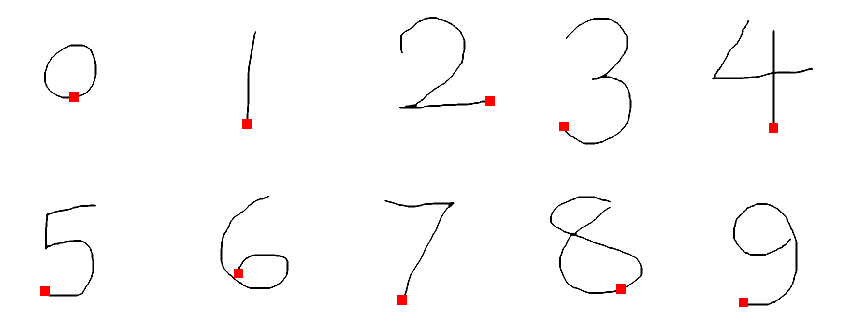

In [9]:
plt.figure(figsize=(15,6))
for i in range(10):
    testimage = np.ones((300, 300, 3), dtype=int)*255
    testimage[:, :, 0] = number_gray[i]
    testimage[:, :, 1] = number_gray[i]
    testimage[:, :, 2] = number_gray[i]
    # print(list(endpoint_stack_img[i].queue))
    # while(not endpoint_stack_img[i].empty()):
    #   x,y = endpoint_stack_img[i].get()
    #   testimage[x-10:x+10,y-10:y+10,0] = 255
    #   testimage[x-10:x+10,y-10:y+10,1] = 0
    #   testimage[x-10:x+10,y-10:y+10,2] = 0
    #   tempqueue.put((x,y))
    tempx, tempy = endpoint_stack_img[i].get()
    testimage[tempx-10:tempx+10,tempy-10:tempy+10,0] = 255
    testimage[tempx-10:tempx+10,tempy-10:tempy+10,1] = 0
    testimage[tempx-10:tempx+10,tempy-10:tempy+10,2] = 0
    endpoint_stack_img[i].put(tempx, tempy)
    plt.subplot(2, 5, i+1)
    plt.imshow(testimage, cmap='gray')
    plt.axis("off")